<a href="https://colab.research.google.com/github/lucssoares7/Dados/blob/analise_exploratoria/Analise_de_Dados_Servidores_P%C3%BAblicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análise de Dados do tempo de serviço e evolução salarial desde 2016 (conforme dados disponíveis no portal da transparência)  no cargo de "Instrutor de Informática" na Prefeitura Municipal de Cascavel - PR

Dados disponíveis em: https://cascavel.atende.net/transparencia

Carregando Dados dos Funcionários Exonerados


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

caminho_exonerados = "/content/drive/MyDrive/Dados/Servidores/Relação de Exonerados - Relatório.csv"
data_exonerados = pd.read_csv(caminho_exonerados,sep=",",encoding="utf-8",error_bad_lines=False)
data_exonerados.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-12-f3ec854a858d>:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data_exonerados = pd.read_csv(caminho_exonerados,sep=",",encoding="utf-8",error_bad_lines=False)


,Nome Funcionário,Data Admissão,Data Rescisão,Descrição Cargo
0,UTTARA KLAIME,10/12/1969,21/07/1990,OFICIAL ADMINISTRATIVO
1,GERALDO PIO DUARTE,18/12/1964,29/08/1990,CARGO NECESSÁRIO WEB
2,NEUZA HORBACH,15/01/1968,30/12/1996,ASSESSOR ADMINISTRATIVO
3,LURDES MIOLA,01/03/1971,01/09/1990,ESCRITURARIO
4,MARA DILETA CAPELLESSO SANTOS,01/05/1972,30/12/1996,ASSESSOR


In [13]:
#String para data
from datetime import datetime
def strToDate(data_string):
  formato_data = "%d/%m/%Y"
  return datetime.strptime(data_string, formato_data)

In [14]:
#correção de dados
for i in range(len(data_exonerados)):
    linha = data_exonerados.iloc[i]




Métodos úteis

In [15]:
#Formatar dias em anos, meses e dias
def formatData(dias):
    anos = dias // 365
    meses = (dias % 365) // 30
    dias_restantes = (dias % 365) % 30
    return anos, meses, dias_restantes
def strToReal(str):
  return float(str)

def strToInt(str):
  return int(str)

In [16]:
#Classe dos funcionários
from datetime import date
class Funcionario:
  def __init__(self, nome):
    self.nome = nome
    self.matricula = None
    self.cargo = None
    #self.data_admissao_date = strToDate(data_admissao_str)
    self.data_admissao = None
    self.data_demissao = None
    #self.data_demissao_date = strToDate(data_demissao_str)
    self.tempo_total = None
    self.salario_bruto = None
    self.salario_liquido = None
    self.salario_bruto_ano = {}
    self.salario_liquido_ano = {}
    self.anos_trabalhados = []
  def setMatricula(self,matricula):
    self.matricula = strToInt(matricula)

  def setDemissao(self,data_demissao):
    self.data_demissao = data_demissao

  def setCargo(self,cargo):
    self.cargo = cargo

  def setSalario_ano(self, salario_bruto,salario_liquido,ano):
    if ano not in self.anos_trabalhados:
      self.salario_bruto_ano[ano] = (strToReal(salario_bruto))
      self.salario_liquido_ano[ano] = (strToReal(salario_liquido))
      #anos trabalhados serve para consultar apenas os salários recebidos a cada ano
      self.anos_trabalhados.append(ano)
    #else:

  def setTempototal(self):
    #print(f"Demissão em: {self.data_demissao}")
    data_de_hoje = date.today()
    data_formatada = data_de_hoje.strftime("%d/%m/%Y")
    if self.data_demissao is None:
      self.tempo_total = strToDate(data_formatada) - self.data_admissao
    else:
      self.tempo_total = self.data_demissao - self.data_admissao

  def getSalario(self,ano):
    return self.salario_bruto_ano[ano],self.salario_liquido_ano[ano]

  def getSalariosLiquidos(self):
    return self.salario_liquido_ano

  def getSalariosBrutos(self):
    return self.salario_bruto_ano
  def getAnosTrabalhados(self):
    return self.anos_trabalhados

  def getNome(self):
    return self.nome
  def setAdmissao(self,data_admissao):
    self.data_admissao = data_admissao

  def getAdmissao(self):
    return self.data_admissao

  def getDemissao(self):
    return self.data_demissao
  def __str__(self):
      anos, meses, dias_restantes = formatData(self.tempo_total.days)
      admissao_formatada =self.data_admissao.strftime("%d/%m/%Y")

      if(data_demissao is not None):
        demissao_formatada = self.data_demissao.strftime("%d/%m/%Y")
      else:
        data_de_hoje = date.today()
        demissao_formatada = data_de_hoje.strftime("%d/%m/%Y")

      return f"Nome: {self.nome} \n{admissao_formatada} - {demissao_formatada}\n{anos} anos, {meses} meses e {dias_restantes} dias."


Preenchendo classe dos funcionários exonerados

In [17]:
from dateutil.relativedelta import relativedelta

lista_exonerados = []
for i in range(len(data_exonerados)):  # Ou use range(len(df.index)) para iterar pelos índices das linhas
    linha = data_exonerados.iloc[i]
    #print(f"Índice: {i}")
    #print(f"Nome: {linha.iloc[0]}")  # Acessando a primeira coluna
    #print(f"Sobrenome: {linha.iloc[1]}")  # Acessando a segunda coluna
    #print(f"Salário: {linha.iloc[2]}")  # Acessando a terceira coluna
    #print()
    nome = linha.iloc[0]
    data_admissao =  strToDate(linha.iloc[1])
    data_demissao =  strToDate(linha.iloc[2])
    diferenca = data_demissao - data_admissao
    if(diferenca.days<0):
      data_admissao = data_demissao
    exonerado = Funcionario(nome)
    exonerado.setAdmissao(data_admissao)
    exonerado.setDemissao(data_demissao)
    exonerado.setTempototal()
    lista_exonerados.append(exonerado)

Imprimir lista de Funcionários que foram desligados bem como o tempo de serviço

In [18]:
for e in lista_exonerados:
  #print(f"Nome: {e.nome}")
  admissao_formatada = e.data_admissao.strftime("%d/%m/%Y")
  #print(f"Entrou em: {admissao_formatada}")
  demissao_formatada = e.data_demissao.strftime("%d/%m/%Y")
  #print(f"Saiu em: {demissao_formatada}")
  e.setTempototal()
  anos, meses, dias_restantes = formatData(e.tempo_total.days)
  #print(e.tempo_total.days," dias")
  #print(f"Aproximadamente {anos} anos, {meses} meses e {dias_restantes} dias.")
  #print()

Análise estatística

In [19]:
#calcular rotatividade
def calcRotatividade(deixaram,total):
  if(total == 0):
    return 0
  return (float(deixaram/total))*100

In [20]:
#obtém as estatísticas
import sys
tempos = 0
min = sys.maxsize
max = 0

for e in lista_exonerados:
  tempos = tempos + e.tempo_total.days
  #obtem o maior valor
  if(e.tempo_total.days>max):
    maisvelho = e
    max = e.tempo_total.days
  if(e.tempo_total.days<min):
    maisnovo = e
    min = e.tempo_total.days
tempo_medio = tempos/len(lista_exonerados)
print("Maior tempo na rede:")
print(maisvelho)
print()
print("Menor tempo na rede:")
print(maisnovo)
print()
anos, meses, dias_restantes = formatData(round(tempo_medio))
print(f"Tempo Médio aproximado de permanência na rede é de {anos} anos, {meses} meses e {dias_restantes} dias.")

Maior tempo na rede:
Nome: DIRCEU GONCALVES PADILHA 
23/08/1971 - 29/02/2012
40 anos, 6 meses e 20 dias.

Menor tempo na rede:
Nome: AMAURI MARCONDES DE OLIVEIRA 
31/03/1991 - 31/03/1991
0 anos, 0 meses e 0 dias.

Tempo Médio aproximado de permanência na rede é de 3 anos, 5 meses e 0 dias.


In [21]:
caminho_atual = "/content/drive/MyDrive/Dados/Servidores/Relação de Efetivos - Relatório .csv"
data_atual = pd.read_csv(caminho_atual,sep=",",encoding="utf-8",error_bad_lines=False)
#data_atual.head()

<ipython-input-21-498b71324c8c>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data_atual = pd.read_csv(caminho_atual,sep=",",encoding="utf-8",error_bad_lines=False)


Preencher Dados da Lista Atual

In [22]:
from dateutil.relativedelta import relativedelta

lista_atual = []
for i in range(len(data_atual)):  # Ou use range(len(df.index)) para iterar pelos índices das linhas
    linha = data_atual.iloc[i]
    #print(f"Índice: {i}")
    #print(f"Nome: {linha.iloc[0]}")  # Acessando a primeira coluna
    #print(f"Sobrenome: {linha.iloc[1]}")  # Acessando a segunda coluna
    #print(f"Salário: {linha.iloc[2]}")  # Acessando a terceira coluna
    #print()
    nome = linha.iloc[0]
    data_admissao =  strToDate(linha.iloc[1])
    if(diferenca.days<0):
      data_admissao = data_demissao
    funcionario_ativo = Funcionario(nome)
    funcionario_ativo.setAdmissao(data_admissao)
    lista_atual.append(funcionario_ativo)

Imprimir lista de Funcionários em atividade

In [23]:
for e in lista_atual:
  #print(f"Nome: {e.nome}")
  admissao_formatada = e.data_admissao.strftime("%d/%m/%Y")
  #print(f"Entrou em: {admissao_formatada}")
  e.setTempototal()
  anos, meses, dias_restantes = formatData(e.tempo_total.days)
  #print(e.tempo_total.days," dias")
  #print(f"Aproximadamente {anos} anos, {meses} meses e {dias_restantes} dias.")
  #print()

Unir Exonerados e em Atividade

In [24]:
#junta listas
relacao_funcionarios =  lista_exonerados + lista_atual
#for f in relacao_funcionarios:
#  print(f"Nome: {f.nome}        Data de Admissão: {f.data_admissao}")

In [25]:
#calcular a rotatividade para cada ano considerando apenas os exonerados
primeiro_ano = 2023
ultimo_ano = 0
total_anterior=0
total_entrada=0
total_saida=0

ano_quantidade_entrada = {}
ano_quantidade_saida = {}
for e in lista_exonerados:
    ano_admissao = e.getAdmissao().year
    ano_demissao = e.getDemissao().year
    if(ano_admissao < primeiro_ano):
      primeiro_ano = ano_admissao
    if(ano_demissao > ultimo_ano):
      ultimo_ano = ano_demissao
    if ano_admissao in ano_quantidade_entrada:
        ano_quantidade_entrada[ano_admissao] = ano_quantidade_entrada[ano_admissao] + 1
    else:
        ano_quantidade_entrada[ano_admissao] = 1

    if ano_demissao in ano_quantidade_saida:
        ano_quantidade_saida[ano_demissao] = ano_quantidade_saida[ano_demissao] + 1
    else:
        ano_quantidade_saida[ano_demissao] = 1
#print(ano_quantidade_entrada)
# Ordenar o dicionário com base nos valores em ordem crescente
entrada_ordenada = dict(sorted(ano_quantidade_entrada.items(), key=lambda item: item[0]))
saida_ordenada = dict(sorted(ano_quantidade_saida.items(), key=lambda item: item[0]))
#print(primeiro_ano)
#print(ultimo_ano)

for chave in range(primeiro_ano,ultimo_ano+1,1):
  entrada = 0
  saida = 0
  if(chave in ano_quantidade_entrada):
    entrada = ano_quantidade_entrada[chave]
  else:
    entrada = 0
  if(chave in ano_quantidade_saida):
    saida = ano_quantidade_saida[chave]
  else:
    saida = 0

  total_entrada = total_entrada + entrada
  total_anterior = total_entrada-total_saida

  total_saida = total_saida + saida
  #if(entrada>0 or saida>0):

    #print(f"No ano de {chave} entraram {entrada} funcionários e saíram {saida} funcionários")
    #print(f"Total acumulado: {total_entrada-total_saida} funcionários")
    #print(f"Taxa de rotatividade no ano {chave}: {round(calcRotatividade(saida,total_anterior))}%")
  entrada = 0
  saida = 0
  #print()

# Exibir o dicionário ordenado
#print(dicionario_ordenado)
total_entrada = 0
total_saida = 0



In [26]:
#calcular a rotatividade para cada ano considerando todos
primeiro_ano = datetime.now().year
ultimo_ano =  datetime.now().year
total_anterior=0
total_entrada=0
total_saida=0
tempos=0
tempo_medio = 0
ano_quantidade_entrada = {}
ano_quantidade_saida = {}
min = sys.maxsize
max = 0
tempos_medios = []
for e in relacao_funcionarios:
    tempos = tempos + e.tempo_total.days
    #print(tempos)
    ano_admissao = e.getAdmissao().year
    if e.getDemissao() is None:
      ano_demissao = datetime.now().year+1
    else:
        ano_demissao = e.getDemissao().year

    if(ano_admissao < primeiro_ano):
      primeiro_ano = ano_admissao
    #if(ano_demissao > ultimo_ano):
    #  ultimo_ano = ano_demissao
    if(e.tempo_total.days>max):
      maisvelho = e
      max = e.tempo_total.days
    if(e.tempo_total.days<min):
      maisnovo = e
      min = e.tempo_total.days

    if ano_admissao in ano_quantidade_entrada:
        ano_quantidade_entrada[ano_admissao] = ano_quantidade_entrada[ano_admissao] + 1
    else:
        ano_quantidade_entrada[ano_admissao] = 1

    if ano_demissao in ano_quantidade_saida:
        ano_quantidade_saida[ano_demissao] = ano_quantidade_saida[ano_demissao] + 1
    else:
        ano_quantidade_saida[ano_demissao] = 1

tempo_medio = tempos/len(relacao_funcionarios)
#tempos_medios.append(tempo_medio)
#print(ano_quantidade_entrada)
# Ordenar o dicionário com base nos valores em ordem crescente
entrada_ordenada = dict(sorted(ano_quantidade_entrada.items(), key=lambda item: item[0]))
saida_ordenada = dict(sorted(ano_quantidade_saida.items(), key=lambda item: item[0]))
#print(primeiro_ano)
#print(ultimo_ano)
total_acumulado={}
taxa_rotatividade_ano={}
anos_relevantes = []
for chave in range(primeiro_ano,ultimo_ano+1,1):
  entrada = 0
  saida = 0
  if(chave in ano_quantidade_entrada):
    entrada = ano_quantidade_entrada[chave]
  else:
    entrada = 0
  if(chave in ano_quantidade_saida):
    saida = ano_quantidade_saida[chave]
  else:
    saida = 0
  total_anterior = total_entrada-total_saida
  total_entrada = total_entrada + entrada
  total_saida = total_saida + saida
  if(entrada>0 or saida>0):
    anos_relevantes.append(chave)
    #print(f"No ano de {chave} entraram {entrada} funcionários e saíram {saida} funcionários")
    #print(f"Total acumulado: {total_entrada-total_saida} funcionários")
    total_acumulado[chave] = total_entrada-total_saida
    #print(f"Taxa de rotatividade no ano {chave}: {round(calcRotatividade(saida,total_anterior))}%")
    taxa_rotatividade_ano[chave] = round(calcRotatividade(saida,total_anterior))
  entrada = 0
  saida = 0
  #print()

# Exibir o dicionário ordenado
#print(dicionario_ordenado)
total_entrada = 0
total_saida = 0

#print(anos_relevantes)

In [27]:
import operator
import sys
#print(taxa_rotatividade_ano)
#print(total_acumulado)
ano_menor_qtd = 0
ano_maior_qtd = 0
maior_qtd = 0
menor_qtd = sys.maxsize

for a,v in total_acumulado.items():
  if(v>maior_qtd):
    ano_maior_qtd = a
    maior_qtd = v
  if(v<menor_qtd):
    ano_menor_qtd = a
    menor_qtd = v


#print(f"O ano {ano_maior_qtd} teve {maior_qtd} funcionários e o ano {ano_menor_qtd} teve {menor_qtd} funcionários")
#print("Ano  |Nº de Funcionários  |Rotatividade")
taxa_media = 0
for ano in anos_relevantes:
  taxa_media = taxa_media + taxa_rotatividade_ano[ano]
  #print(f"{ano} |{total_acumulado[ano]:03d}                 |{taxa_rotatividade_ano[ano]:02d}%")
print()
taxa_media = taxa_media/len(taxa_rotatividade_ano)
print(f"A taxa de Rotatividade média é de {round(taxa_media)}%")
anos, meses, dias_restantes = formatData(round(tempo_medio))
print(f"Tempo médio de permanência é de aproximadamente {anos} anos, {meses} meses e {dias_restantes} dias.")
print()
print("Maior tempo na rede:")
print(maisvelho)
print()
print("Menor tempo na rede:")
print(maisnovo)



A taxa de Rotatividade média é de 14%
Tempo médio de permanência é de aproximadamente 4 anos, 8 meses e 8 dias.

Maior tempo na rede:
Nome: DIRCEU GONCALVES PADILHA 
23/08/1971 - 29/02/2012
40 anos, 6 meses e 20 dias.

Menor tempo na rede:
Nome: AMAURI MARCONDES DE OLIVEIRA 
31/03/1991 - 31/03/1991
0 anos, 0 meses e 0 dias.


In [28]:
import matplotlib.pyplot as plt
estatisticas =[total_acumulado, taxa_rotatividade_ano]
df = pd.DataFrame(estatisticas)
df = df.rename(index={0: "Número de Funcionários", 1: "Taxa de Rotatividade"})

# Exiba o DataFrame
#print(df)

Evolução Salarial dos Instrutores de Informática desde 2016 (conforme dados disponíveis)


In [29]:
def obter_ano(dicionario):
    anos = list(dicionario['Salario'].keys())
    # Se o dicionário 'Salario' estiver vazio, retorne 0 para manter a ordem
    if anos:
        return int(anos[0])
    else:
        return 0


def geradorGrafico():
  inicial = indices_encontrados[0]
  final = indices_encontrados[len(indices_encontrados)-1]
  funcionarios_pesquisados = []
  #print(inicial, final)
  for indice in indices_encontrados:
      if indice < len(funcionarios_df):
          elemento = funcionarios_df[indice]
          funcionarios_pesquisados.append(elemento)



  # Ordene a lista de dicionários com base no ano de 'Salario'
  funcionarios_pesquisados_ordem = sorted(funcionarios_pesquisados, key=obter_ano)
  #print(funcionarios_pesquisados)
  #print(funcionarios_pesquisados_ordem)
  #df = pd.DataFrame(funcionarios_df)
  df = pd.DataFrame(funcionarios_pesquisados_ordem)
  # Para expandir os dados dos salários em colunas separadas, você pode usar o método .apply
  df = df.join(df['Salario'].apply(pd.Series))
  df.drop(columns=['Salario'], inplace=True)  # Remove a coluna 'Salario'

  # Exiba o DataFrame
  print(df)
  df.set_index('Nome', inplace=True)

  # Transponha o DataFrame para que os anos se tornem índices
  df = df.transpose()

  # Plote um gráfico de linha para cada nome
  df.plot(kind='line', marker='o')
  plt.title("Evolução dos Salários ao Longo dos Anos")
  plt.xlabel("Ano")
  plt.ylabel("Salário")
  plt.grid(True)

  # Exiba o gráfico
  plt.legend(title='Nome')

  plt.show()

Digite o nome que deseja pesquisar: sirlei soares
                       Nome     2016     2017     2018     2019      2020  \
0   SIRLEI SOARES DE AGUIAR  4061.91  4185.51  4330.87  3217.87  12221.90   
1  SIRLEI SOARES DOS SANTOS  1215.38  1391.74  1669.45  1810.59   1986.14   

      2021     2022     2023  
0  5380.53  5236.49  7759.62  
1  2030.10  2073.13  3069.58  


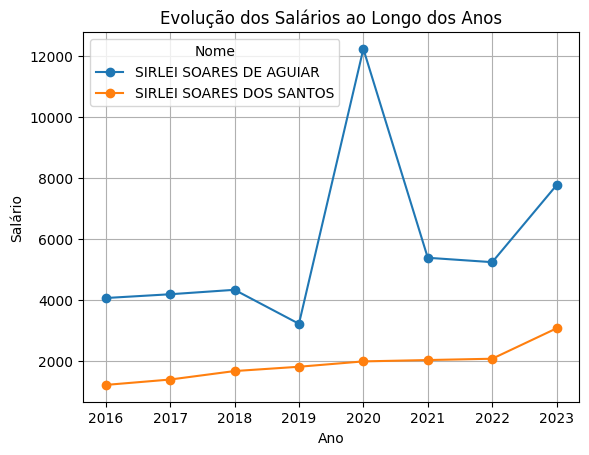

In [30]:
import csv
from itertools import groupby
import matplotlib.pyplot as plt
caminho_salarios = "/content/drive/MyDrive/Dados/Servidores/Relação ServidorXSalário - Relação ServidorXSalário.csv"
#data_salarios = pd.read_csv(caminho_salarios,sep=",",encoding="utf-8",error_bad_lines=False)
#data_salarios.head()

funcionarios = []

# Abra o arquivo CSV a partir do Google Drive
with open(caminho_salarios, newline='',encoding="utf-8") as arquivo_csv:
    leitor_csv = csv.DictReader(arquivo_csv)

    # Itere pelas linhas do arquivo CSV
    for linha in leitor_csv:
        funcionarios.append(linha)

# Agora, a lista funcionarios contém os dados do arquivo CSV do Google Drive
#for funcionario in funcionarios:
#    print(f"Nome: {funcionario['Nome Funcionário']}, Salário Bruto: {funcionario['Salário Bruto']}, Salário Liquido: {funcionario['Salário Líquido']},{funcionario['Ano']} ")

funcionarios_ordenados = sorted(funcionarios, key=lambda x: x["Nome Funcionário"])
#for funcionario in funcionarios_ordenados:
#   print(f"Nome: {funcionario['Nome Funcionário']}, Salário Bruto: {funcionario['Salário Bruto']}, Salário Liquido: {funcionario['Salário Líquido']},{funcionario['Ano']} ")
grupos = groupby(funcionarios_ordenados, key=lambda x: x["Nome Funcionário"])
lista_funcionarios_salario = []
# Itere pelos grupos e imprima os funcionários por nome
for nome, funcionarios_no_grupo in grupos:
    #print(f"Funcionários com nome '{nome}':")
    f = Funcionario(nome)

    for funcionario in funcionarios_no_grupo:
        #print(f"- Salario Bruto:  {funcionario['Salário Bruto']}, Salário Liquido: {funcionario['Salário Líquido']} em {funcionario['Ano']}")
        f.setSalario_ano(funcionario['Salário Bruto'],funcionario['Salário Líquido'], funcionario['Ano'])
    lista_funcionarios_salario.append(f)
    #print()
funcionarios_df = []
aux = 0
for elemento in lista_funcionarios_salario:
  #print(elemento)
  #aux = aux + 1

  func ={"Nome":elemento.getNome(),"Salario":elemento.getSalariosLiquidos()}
  funcionarios_df.append(func)
#print(funcionarios_df)

#print(lista)
#for lista in lista_funcionarios_salario:
  #print(lista.getNome())
  #print(lista.getSalariosLiquidos())
#funcionarios_exemplo = {
 #   "Funcionário 1": {2016: 50000, 2017: 52000, 2018: 54000, 2019: 56000, 2020: 58000, 2021: 60000, 2022: 62000, 2023: 64000},
 #   "Funcionário 2": {2016: 45000, 2017: 47000, 2018: 49000, 2019: 51000, 2020: 53000, 2021: 55000, 2022: 57000, 2023: 59000}
#}

nome_pesquisado = input("Digite o nome que deseja pesquisar: ")
nome_pesquisado = nome_pesquisado.upper()
indices_encontrados = []

# Itera sobre os dicionários na lista e rastreia os índices que contêm a substring
for indice, item in enumerate(funcionarios_df):
    if 'Nome' in item and nome_pesquisado in item['Nome']:
        indices_encontrados.append(indice)

if indices_encontrados:
    #print(f'A substring "{nome_pesquisado}" foi encontrada nos seguintes índices: {indices_encontrados}')
    geradorGrafico()
else:
    print(f'A substring "{nome_pesquisado}" não foi encontrada em nenhum dicionário.')